### Load Library

In [2]:
from openpyxl import load_workbook
from nltk.cluster import KMeansClusterer, euclidean_distance
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

### Load data excel

In [3]:
wb = load_workbook(filename = 'Data Alumni pelatihan phiton.xlsx')
sheet_ranges = wb['Sheet1']

df = pd.DataFrame(sheet_ranges.values)

### Data Formating

In [4]:
d = df[4:20][[1,3,12,9,6,7,10,11]]
# [4:20] baris ke 4 sampai 20
# [1,3,2,12] kolom ke 1 ke 3 ke 2 ke 12

#Setting kolom NIM, TTL, Nama, IPK
d.columns = ['NIM','TTL','IPK','LAMA TUNGGU','TAHUN MASUK','TAHUN LULUS','GAJI','TOEFL']
d = d.dropna(axis=0, how='any')

# print d.dtypes check data type

# untuk mendapatkan tanggal sekarang
t = pd.tslib.Timestamp.now()
t.to_datetime()

#mengambil tahunnya saja
t.year

# Setting kolom Tahun Lahir
for index, row in d.iterrows():
    d.ix[index,'TAHUN LAHIR'] = row['TTL'][-4:]

for index, row in d.iterrows():
    d.ix[index,'UMUR'] = t.year - int(row['TAHUN LAHIR'])

for index, row in d.iterrows():
    d.ix[index,'MASA STUDI']=row['TAHUN LULUS']-row['TAHUN MASUK']

# convert ipk to string
d['IPK'] = d['IPK'].apply(str) 

# replace , menjadi . kemudian dilakukan convert ipk to string
d['IPK'] = d['IPK'].str.replace(',','.').apply(float) 

# convert GAJI to float
d['GAJI'] = d['GAJI'].apply(float)

# convert MASA STUDI to int
d['MASA STUDI'] = d['MASA STUDI'].apply(int)

### Template Table

In [5]:
d[['NIM','UMUR','IPK','MASA STUDI','LAMA TUNGGU','GAJI','TOEFL']]

,NIM,UMUR,IPK,MASA STUDI,LAMA TUNGGU,GAJI,TOEFL
4,9018263,28.0,2.13,7,2.4,1.475635e+06,390
7,9018269,27.0,2.75,7,2.4,1.475634e+06,413
9,9020026,25.0,3.24,7,2.4,1.475635e+06,400
10,12018060,23.0,3.27,4,2.4,1.475635e+06,396
11,11018022,24.0,3.20,5,2.4,1.475635e+06,460
12,9018212,26.0,3.24,7,0,6.000000e+05,403
13,9018301,26.0,3.06,7,2.4,1.475635e+06,450
14,12022020,25.0,3.47,4,2.4,1.200000e+06,423
15,12022038,22.0,3.62,4,2.4,1.475635e+06,413
16,12019039,25.0,3.32,4,2.4,1.475635e+06,480


### IPK dan MASA STUDI sebagai feature untuk penentuan cluster

In [6]:
g = d[['IPK','MASA STUDI']].as_matrix()
vectors = [np.array(f) for f in list(g)]

### KMeans 3 Cluster dengan menggunakan euclidean distance

In [7]:
clusterer = KMeansClusterer(4, euclidean_distance, avoid_empty_clusters=True, repeats=10)
clusters = clusterer.cluster(vectors, True, trace=False)

### Hasil Cluster

In [8]:
print('Clustered:', vectors)
print('As:', clusters)
print('Means:', clusterer.means())

Clustered: [array([ 2.13,  7.  ]), array([ 2.75,  7.  ]), array([ 3.24,  7.  ]), array([ 3.27,  4.  ]), array([ 3.2,  5. ]), array([ 3.24,  7.  ]), array([ 3.06,  7.  ]), array([ 3.47,  4.  ]), array([ 3.62,  4.  ]), array([ 3.32,  4.  ]), array([ 3.14,  5.  ]), array([ 2.99,  7.  ]), array([ 3.6,  4. ])]
As: [3, 3, 3, 0, 2, 3, 3, 0, 1, 0, 2, 3, 1]
Means: [array([ 3.35333333,  4.        ]), array([ 3.61,  4.  ]), array([ 3.17000002,  4.99999987]), array([ 2.90166667,  7.        ])]


coordinate 4 [ 2.13  7.  ] labels 3
coordinate 7 [ 2.75  7.  ] labels 3
coordinate 9 [ 3.24  7.  ] labels 3
coordinate 10 [ 3.27  4.  ] labels 0
coordinate 11 [ 3.2  5. ] labels 2
coordinate 12 [ 3.24  7.  ] labels 3
coordinate 13 [ 3.06  7.  ] labels 3
coordinate 14 [ 3.47  4.  ] labels 0
coordinate 15 [ 3.62  4.  ] labels 1
coordinate 16 [ 3.32  4.  ] labels 0
coordinate 17 [ 3.14  5.  ] labels 2
coordinate 18 [ 2.99  7.  ] labels 3
coordinate 19 [ 3.6  4. ] labels 1


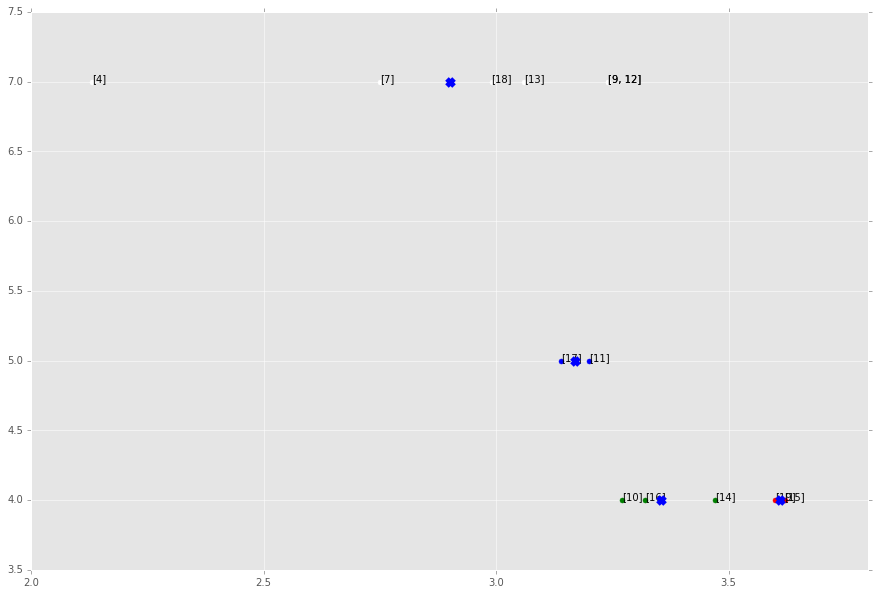

In [9]:
plt.figure(figsize=(15,10))

centroids = np.asarray(clusterer.means())
labels = clusters
colors = ['g.','r.','b.','w.']

idxTable = d.index.tolist()

for i in range(len(vectors)):
    list_cluster = d[(d['IPK'] == vectors[i][0]) & (d['MASA STUDI'] == vectors[i][1])].index.tolist()
    print('coordinate %s'%idxTable[i], vectors[i], 'labels', labels[i])
    plt.plot(vectors[i][0], vectors[i][1], colors[labels[i]], markersize=10)
    plt.text(vectors[i][0], vectors[i][1], '%s'%(list_cluster))

plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', s=50, linewidths=5, zorder=10)
plt.show()

Automatically created module for IPython interactive environment
[1 1 1 0 0 1 1 0 0 0 0 1 0]
For n_clusters = 2 The average silhouette_score is : 0.796226367944


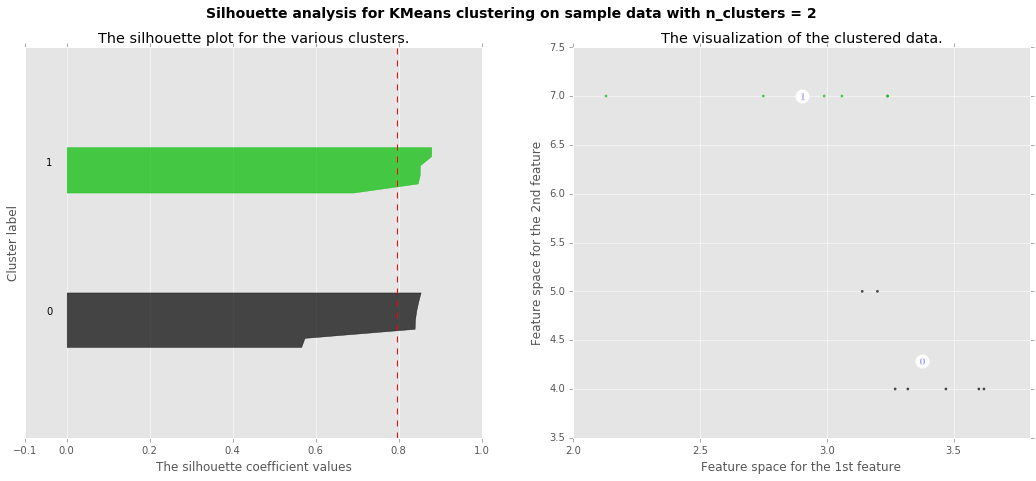

[1 1 1 0 2 1 1 0 0 0 2 1 0]
For n_clusters = 3 The average silhouette_score is : 0.814583149358


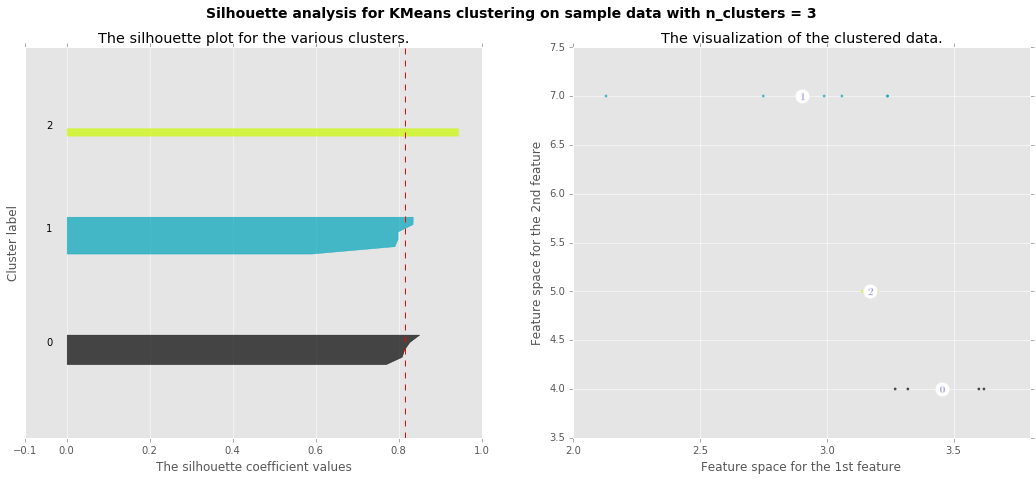

[3 0 0 1 2 0 0 1 1 1 2 0 1]
For n_clusters = 4 The average silhouette_score is : 0.729517494029


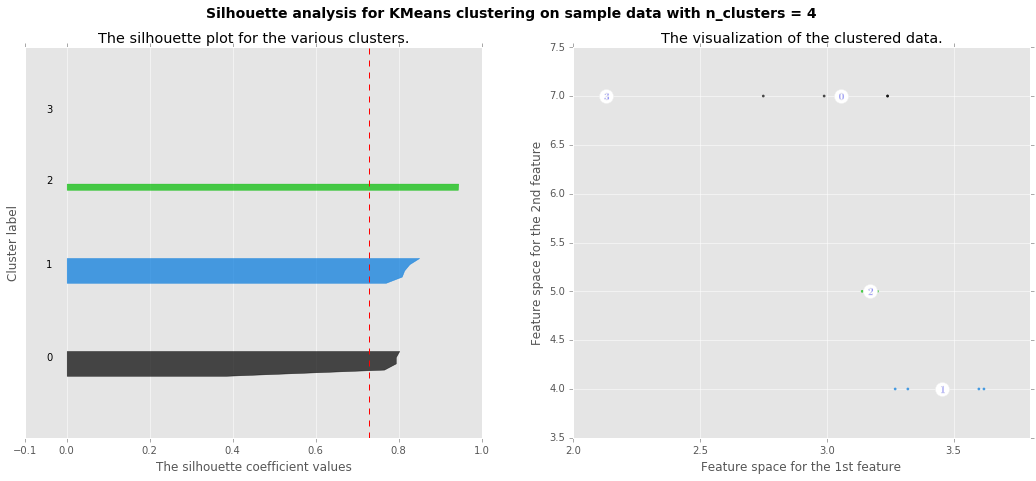

[4 0 3 1 2 3 3 1 1 1 2 3 1]
For n_clusters = 5 The average silhouette_score is : 0.623876992035


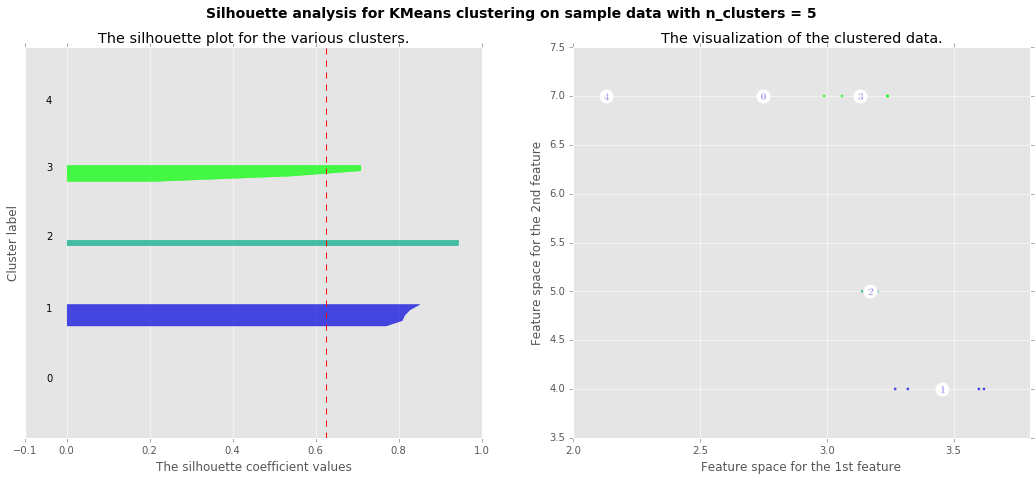

[4 1 3 5 2 3 3 0 0 5 2 3 0]
For n_clusters = 6 The average silhouette_score is : 0.566044043516


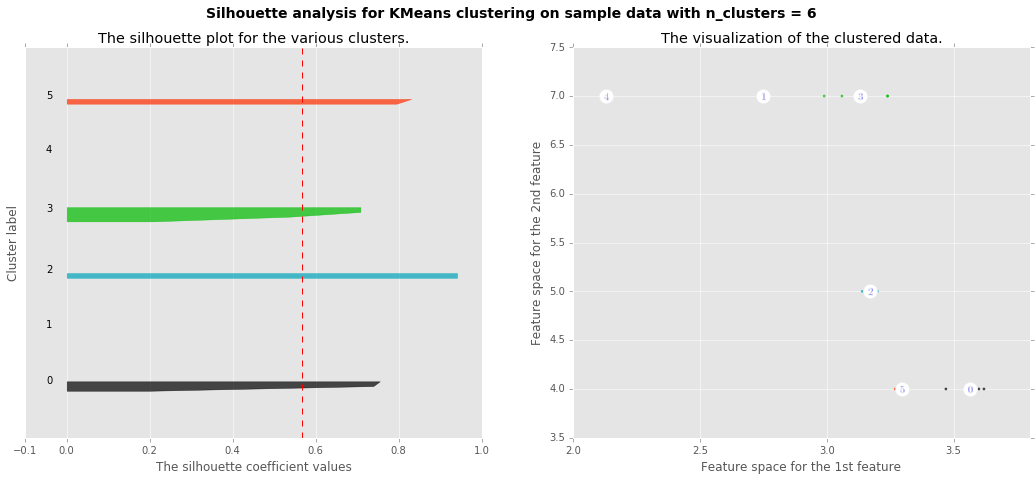

In [10]:
from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

X = g
y = clusters

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    print(cluster_labels)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()